## Machine Learning (CITS5508) Lab sheet 4 - Project 2
Author: Prathyusha Sangam (22357815)

### About the data
The data is obtained from The Bureau of Meteorology (BOM), Australia. The data has weather information collected every day, in Perth Metro area, during the period January 2017-March 2018. The features chosen for this project are:
* Date : Year, Month, Day
* Rainfall amount: in milliliters
* Maximum Temperature: in degree Celsius
* Daily global solar exposure: in MJ m-2  (value to predict)


**The data used for training contains 365 rows - each representing a day in 2017. The testing data has information from January - March 2018.**

### Project Objective
1. To predict the daily solar exposure values given the expcted date, rainfall amount and maximum temperature
2. Techniques used: Decision trees and SVM


### Document Outline
* [Step 1: Set up imports and load data](#Step-1:-Set-up-imports-and-load-data)
* [Step 2: Understand the data](#Step-2:-Understand-the-data)
    * [Findings of step 2](#Findings-of-step-2:)
* [Step 3:](#)

### Step 1: Set up imports and load data

In [1]:
# allowing multiple/scrollable outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
dataframe = pd.read_csv('Datasets/BOMdata.csv') #collated CSV from multiple files obtained from BOM, Australia
dataframe.head()

,Year,Month,Day,Rainfall_Amt,Max_Temp,Solar_Exposure
0,2017,1,1,0.0,31.3,31.7
1,2017,1,2,0.0,37.1,31.7
2,2017,1,3,0.0,40.0,31.7
3,2017,1,4,0.0,40.9,31.5
4,2017,1,5,0.0,24.9,19.5


[Back to top](#Document-Outline)
### Step 2: Understand the data
* To understand timeseries better, we create a new feature called **Date** by combining date parts
* We Look at the shape/distribution and features, Rainfall_Amt, Max_Temp, Solar_Exposure, inspect correlations among the features to get better insights
* We plot the features with respect to time

In [3]:
# combining date parts to obtain 1 pandas date column

dataframe = dataframe.assign(Date=pd.to_datetime(dataframe[['Year','Month','Day']]))
dataframe.head()
dataframe.isnull().sum()


,Year,Month,Day,Rainfall_Amt,Max_Temp,Solar_Exposure,Date
0,2017,1,1,0.0,31.3,31.7,2017-01-01
1,2017,1,2,0.0,37.1,31.7,2017-01-02
2,2017,1,3,0.0,40.0,31.7,2017-01-03
3,2017,1,4,0.0,40.9,31.5,2017-01-04
4,2017,1,5,0.0,24.9,19.5,2017-01-05


Year              0
Month             0
Day               0
Rainfall_Amt      0
Max_Temp          0
Solar_Exposure    0
Date              0
dtype: int64

,Max_Temp,Rainfall_Amt,Solar_Exposure
count,365.000000,365.000000,365.000000
mean,24.974247,2.339726,18.868219
std,5.913808,8.295695,7.912838
min,14.200000,0.000000,3.200000
25%,20.200000,0.000000,12.000000
50%,24.200000,0.000000,17.600000
75%,29.300000,1.000000,26.300000
max,42.000000,114.400000,32.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a159b0>,
      dtype=object)

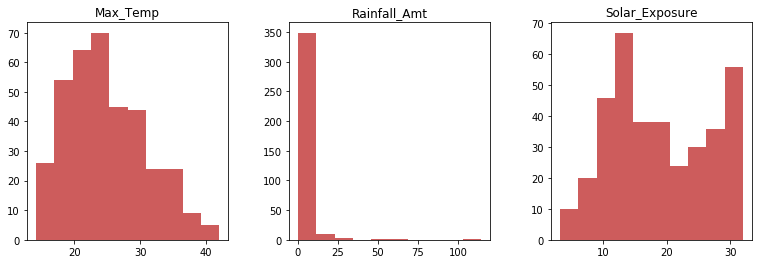

In [4]:
featureframe = dataframe[['Max_Temp','Rainfall_Amt','Solar_Exposure']]

#distribution of features (without time constraint) (y-axis of histogram is frequency)
featureframe.describe()
featureframe.hist(layout = (1,3),figsize=(13,4), color = 'indianred', grid = False)

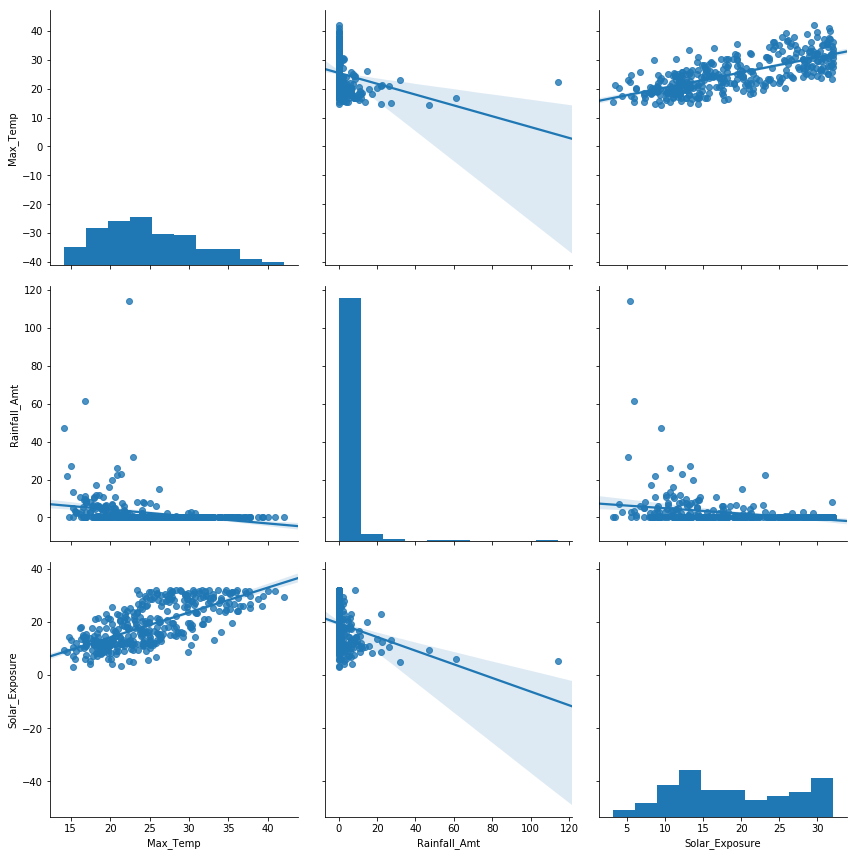

In [5]:
# correlation between 'Max_Temp','Rainfall_Amt' and 'Solar_Exposure'
sns.pairplot(featureframe,size=4,kind="reg")

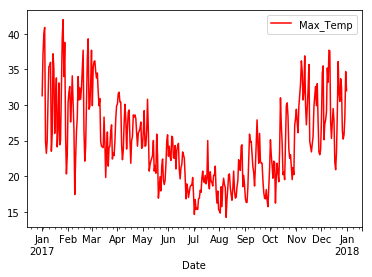

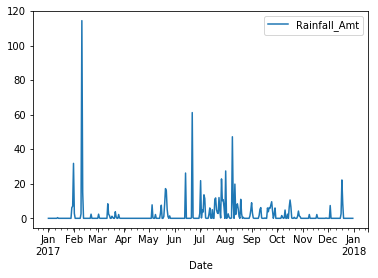

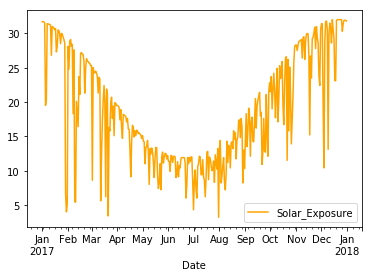

In [6]:
#visualizing Features vs Date

dataframe.plot(x='Date',y='Max_Temp', color='red')
dataframe.plot(x='Date',y='Rainfall_Amt')
dataframe.plot(x='Date',y='Solar_Exposure', color='orange')

[Back to top](#Document-Outline)
### Findings of step 2:
1\. Data has **no missing values**

2\. **Maximum Temperature (Max_Temp):** Describes the maximum temperature recorded on any given day in °C. Max_Temp seems normally distributed, with a very slight skew with **mean: 24.97°C, median: 24.2°C, maximum: 42.0°C**. Perth seems to have very pleasant temperature on an average, with small number of records for extremely high or very low temperatures.

3\. **Rainfall Amount (Rainfall_Amt)** Describes the total daily rainfall in milliliters. The data is heavily skewed, with **mean: 2.339726 ml and median: 0 ml**, 75% of the data has values under 1 ml, the **maximum: 114.4 ml** is a clear outlier, on the whole rainfall above 25 ml a rare event.

4\. **Global Solar Exposure (Solar_Exposure)** Describes the total solar energy for a day falling on a horizontal surface, measured in MJ m-2, with **mean:18.87, median: 17.6, maximum: 32.000000**. The data looks bimodal from histogram. Perth receives moderate to high solar exposure.

5\. **Correlations:** From the correlation matrix we see a strong positive correlation between Max_Temp and Solar_Exposure (more exposure, more heat), negative correlation between Rainfall_Amt and Solar_Exposure (less solar exposure due to cloud cover), and a slight negative correlation between Rainfall_Amt and Max_temp (cooler rainy days), however some outliers in this relationship exist (hot rainy days).

6\. **Weather Features vs Time:** From the time series plots of year 2017, we notice that Perth observes maximum temperatures in Dec and Jan and some of the least temperatures in July and Aug (note the recorded values are Max_Temp of each day), same applies to global solar exposure.Perth had massive rainfall in Feb 2017 and some heavy showers between Jul-Aug, we could say that in 2017 Perth's summer ended with record showers and experienced a rainy winter.



[Back to top](#Document-Outline)
### Step 3: Decisions related to data cleaning

Notes:
Data has to be scaled - SVM is sensitive to feature scaling
using SVM for prediction: kernel ridge regression (KRR) and SVR learn a non-linear function - typically a time series analysis
